progress: 0.000%
progress: 3.962%
progress: 7.924%
progress: 11.886%
progress: 15.848%
progress: 19.809%
progress: 23.771%
progress: 27.733%
progress: 31.695%
progress: 35.657%
progress: 39.619%
progress: 43.581%
progress: 47.543%
progress: 51.505%
progress: 55.466%
progress: 59.428%
progress: 63.390%
progress: 67.352%
progress: 71.314%
progress: 75.276%
progress: 79.238%
progress: 83.200%
progress: 87.161%
progress: 91.123%
progress: 95.085%
progress: 99.047%


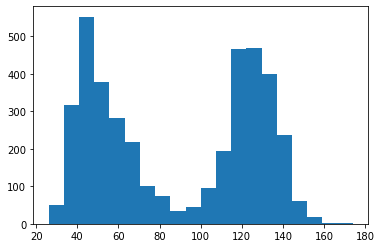

In [8]:
import numpy as np
import random
from skimage import io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from os import listdir

NR_directory = '/vols/lz/lshanahan/data/DD/'
migdal_directory = '/vols/lz/lshanahan/data/DD_migdal/'
e_directory = '/vols/lz/lshanahan/data/e/'


NR_files = [f'{NR_directory}{f}' for f in listdir(NR_directory)]
migdal_files = [f'{migdal_directory}{f}' for f in listdir(migdal_directory)]
e_files = [f'{e_directory}{f}' for f in listdir(e_directory)]

all_files = NR_files + migdal_files + e_files

random.shuffle(all_files)

labels = np.asarray([0 if f.startswith(migdal_directory) else 1 for f in all_files])


long_files = [f for f in migdal_files if ((f[len(migdal_directory)] == "6") and (f[len(migdal_directory)+3] == "."))]

widths = np.zeros((len(long_files),2))
for i,f in enumerate(long_files):
    if i%(len(long_files)//25) == 0:
        print(f'progress: {(100*i/len(long_files)):.3f}%')
    im = io.imread(f)
    im = im[::2,::2] + im[1::2,::2] + im[::2,1::2] + im[1::2,1::2]
#     print(f)

    imsum_y = np.sum(im,axis=0)
    width_y = len(imsum_y[imsum_y>0])
    imsum_x = np.sum(im,axis=1)
    width_x = len(imsum_x[imsum_x>0])
    
    widths[i,:] = width_x,width_y
   

plt.figure()
plt.hist(widths.flatten(),bins=20)

max_width = np.max(widths)

In [10]:
import pickle

pickle.dump(all_files, open( "all_files.p", "wb" ) )
np.save('labels',labels)

In [12]:
all_files = pickle.load( open( "all_files.p", "rb" ) )
labels = np.load('labels.npy')

save_dir = '/vols/lz/lshanahan/data/numpy/'
group_size = 3000
max_width = int(max_width)

for i in range(0*group_size, 14*group_size, group_size): # looping over groups
    labels_group = labels[i:(i+group_size)]
    data_list = []
    energies = np.asarray([float(f.split('k')[0].split('/')[-1]) for f in all_files[i:(i+group_size)]])
    im_stack = np.zeros((len(labels_group),max_width+10,max_width+10))
    keep_data = np.ones(len(labels_group),dtype=bool)
    print()
    for j in range(i, i+group_size): # looping over elements of group
        if (j-i)%(len(labels_group)//5) == 0:
            print(f'Group {i//group_size} progress: {(100*(j-i)/len(labels_group)):.3f}%')
        
        im = io.imread(all_files[j])
        im = im[::2,::2] + im[1::2,::2] + im[::2,1::2] + im[1::2,1::2]
        imsum_x = np.sum(im,axis=1)
        imsum_y = np.sum(im,axis=0)
        try:
            min_x = np.where(imsum_x>0)[0][0]
            min_y = np.where(imsum_y>0)[0][0]
        except:
            keep_data[j-i] = False
            continue

        if min_x > 5:
            min_x -= 5
        else:
            min_x = 0

        if min_y > 5:
            min_y -= 5
        else:
            min_y = 0

        im_slice = im[min_x:(min_x+max_width+10),min_y:(min_y+max_width+10)]
        im_stack[(j-i),:im_slice.shape[0],:im_slice.shape[1]] = im_slice

    np.save(f'{save_dir}data_{int(i//group_size)}', im_stack[keep_data,:,:])
    np.save(f'{save_dir}labels_{int(i//group_size)}', labels_group[keep_data])
    np.save(f'{save_dir}energies_{int(i//group_size)}', energies[keep_data])


Group 0 progress: 0.000%
Group 0 progress: 20.000%
Group 0 progress: 40.000%
Group 0 progress: 60.000%
Group 0 progress: 80.000%

Group 1 progress: 0.000%
Group 1 progress: 20.000%
Group 1 progress: 40.000%
Group 1 progress: 60.000%
Group 1 progress: 80.000%

Group 2 progress: 0.000%
Group 2 progress: 20.000%
Group 2 progress: 40.000%
Group 2 progress: 60.000%
Group 2 progress: 80.000%

Group 3 progress: 0.000%
Group 3 progress: 20.000%
Group 3 progress: 40.000%
Group 3 progress: 60.000%
Group 3 progress: 80.000%

Group 4 progress: 0.000%
Group 4 progress: 20.000%
Group 4 progress: 40.000%
Group 4 progress: 60.000%
Group 4 progress: 80.000%

Group 5 progress: 0.000%
Group 5 progress: 20.000%
Group 5 progress: 40.000%
Group 5 progress: 60.000%
Group 5 progress: 80.000%

Group 6 progress: 0.000%
Group 6 progress: 20.000%
Group 6 progress: 40.000%
Group 6 progress: 60.000%
Group 6 progress: 80.000%

Group 7 progress: 0.000%
Group 7 progress: 20.000%
Group 7 progress: 40.000%
Group 7 prog

### Adding Noise

In [1]:
import numpy as np
import random
from skimage import io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from os import listdir

(3000, 184, 184)


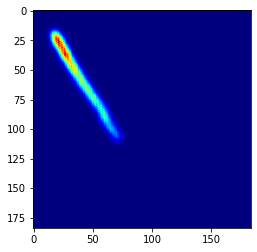

In [2]:
load_dir = '/vols/lz/lshanahan/data/numpy/'
files = listdir(load_dir)

test = np.load(f'{load_dir}/data_1.npy')/20

print(test.shape)

plt.imshow(test[1],cmap='jet');

In [3]:
avg_bg = np.load('../fast_2x2_bg.npy')
avg_noise = np.load("../fast_2x2_noise.npy")

noise = np.stack([io.imread("../bg/"+im) for im in listdir('../bg/')],axis=0)

print(noise.shape)

noise = noise[:,::2,::2] + noise[:,1::2,::2] + noise[:,::2,1::2] + noise[:,1::2,1::2]

print(noise.shape)

(1000, 1152, 1152)
(1000, 576, 576)


In [4]:
load_dir = '/vols/lz/lshanahan/data/numpy/'
files = listdir(load_dir)

avg_bg = np.load('../fast_2x2_bg.npy')
avg_noise = np.load("../fast_2x2_noise.npy")

noise = np.stack([io.imread("../bg/"+im) for im in listdir('../bg/')],axis=0)

noise = noise[:,::2,::2] + noise[:,1::2,::2] + noise[:,::2,1::2] + noise[:,1::2,1::2]

for i in range(int(len(files)/3)): # there are [data,labels,energies] in folder so /3
    
    im_stack = np.load(f'{load_dir}/data_{i}.npy')/20
    
    noise_i = np.random.randint(0,1000,len(im_stack))
    noise_x = np.random.randint(0,392,len(im_stack))
    noise_y = np.random.randint(0,392,len(im_stack))


    noise_train = np.stack([noise[noise_i[j], noise_x[j]:noise_x[j]+184, noise_y[j]:noise_y[j]+184] for j in range(len(noise_i))],axis=0)

    noise_train_2 = np.stack([noise[noise_i[j], noise_x[j]:noise_x[j]+184, noise_y[j]:noise_y[j]+184] - \
                              avg_bg[noise_x[j]:noise_x[j]+184, noise_y[j]:noise_y[j]+184] for j in range(len(noise_i))],axis=0)

    noise_train_3 = np.stack([(noise[noise_i[j], noise_x[j]:noise_x[j]+184, noise_y[j]:noise_y[j]+184] - \
                              avg_bg[noise_x[j]:noise_x[j]+184, noise_y[j]:noise_y[j]+184]) / \
                              avg_noise[noise_x[j]:noise_x[j]+184, noise_y[j]:noise_y[j]+184] for j in range(len(noise_i))],axis=0)


    im_stack_1 = im_stack + noise_train
    im_stack_2 = im_stack + noise_train_2
    im_stack_3 = im_stack + noise_train_3

    im_stack_4 = im_stack_2.copy()
    im_stack_4[im_stack_4 < 0] = -np.sqrt(np.abs(im_stack_4[im_stack_4 < 0]))
    im_stack_4[im_stack_4 > 0] = np.sqrt(im_stack_4[im_stack_4 > 0])

    np.save(f'../data/numpy_noise/data_{i}_noise.npy',im_stack_1)
    np.save(f'../data/numpy_noise/data_{i}_noise_sub_bg.npy',im_stack_2)
    np.save(f'../data/numpy_noise/data_{i}_noise_sqrt_sub_bg.npy',im_stack_4)

    del im_stack_1, im_stack_2, im_stack_4


    for k in np.arange(0,5.1,1):
        im_stack_3[im_stack_3 < k] = 0 
        np.save(f'../data/numpy_noise/data_{i}_noise_{k}_threshold.npy',im_stack_3)
        
    print(f'progress: {(100*i/(len(files)/3)):.3f}%')

progress: 0.000%
progress: 2.778%
progress: 5.556%
progress: 8.333%
progress: 11.111%
progress: 13.889%
progress: 16.667%
progress: 19.444%
progress: 22.222%
progress: 25.000%
progress: 27.778%
progress: 30.556%
progress: 33.333%
progress: 36.111%
progress: 38.889%
progress: 41.667%
progress: 44.444%
progress: 47.222%
progress: 50.000%
progress: 52.778%
progress: 55.556%
progress: 58.333%
progress: 61.111%
progress: 63.889%
progress: 66.667%
progress: 69.444%
progress: 72.222%
progress: 75.000%
progress: 77.778%
progress: 80.556%
progress: 83.333%
progress: 86.111%
progress: 88.889%
progress: 91.667%
progress: 94.444%
progress: 97.222%


### Generator

In [37]:
import tensorflow as tf
from os import listdir
import numpy as np

In [179]:
file_nums = list(range(36))
np.random.shuffle(file_nums)
print(file_nums)

file_nums[:25]
file_nums[25:]

[24, 19, 17, 8, 11, 33, 29, 15, 2, 26, 21, 7, 9, 22, 18, 34, 25, 10, 30, 20, 27, 31, 35, 12, 6, 16, 3, 23, 5, 0, 13, 14, 1, 32, 4, 28]


[16, 3, 23, 5, 0, 13, 14, 1, 32, 4, 28]

In [181]:
def data_gen(file_nums, load_dir = '/vols/lz/lshanahan/data/numpy/'):
    for i in file_nums: 
        data = np.expand_dims(np.load(f'{load_dir}/data_{i}.npy'),-1)
        labels = np.load(f'{load_dir}/labels_{i}.npy').astype(np.int32)
        for j in range(len(labels)):
            yield data[j], labels[j:j+1]
            
# def data_gen_test(file_nums, split, load_dir = '/vols/lz/lshanahan/data/numpy/'):
#     files = listdir(load_dir)
#     for i in file_nums[split:]: # there are [data,labels,energies] in folder so /
#         data = np.expand_dims(np.load(f'{load_dir}/data_{i}.npy'),-1)
#         labels = np.load(f'{load_dir}/labels_{i}.npy').astype(np.int32)
#         for j in range(len(labels)):
#             yield data[j], labels[j:j+1]

In [182]:
# dg = data_gen()
# for i in dg:
#     print(i[0].shape, i[1].shape)

In [183]:
file_nums = list(range(36))
np.random.shuffle(file_nums)
split = 25
train_dataset = tf.data.Dataset.from_generator(data_gen, 
                                        args = (file_nums[:split]),
                                        output_shapes=(tf.TensorShape((184,184,1)),tf.TensorShape(1)), 
                                        output_types=(tf.float64,tf.int32))

train_data_batch = train_dataset.batch(50)

test_dataset = tf.data.Dataset.from_generator(data_gen, 
                                        args = (file_nums[split:]),
                                        output_shapes=(tf.TensorShape((184,184,1)),tf.TensorShape(1)), 
                                        output_types=(tf.float64,tf.int32))

test_data_batch = test_dataset.batch(50)

In [184]:
train_data_batch.element_spec

(TensorSpec(shape=(None, 184, 184, 1), dtype=tf.float64, name=None),
 TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))

In [185]:
test_data_batch.element_spec

(TensorSpec(shape=(None, 184, 184, 1), dtype=tf.float64, name=None),
 TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))

In [186]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, LeakyReLU, Dropout

def opt_model():
    global file_type_list
    opt_model = Sequential([
        Conv2D(10, kernel_size=(3,3), input_shape=(184,184,1), padding='same'),
        LeakyReLU(),
        MaxPooling2D(),
        Conv2D(30, kernel_size=(3,3), padding='same'),
        LeakyReLU(),
        MaxPooling2D(),
        Conv2D(30, kernel_size=(3,3), padding='same'),
        LeakyReLU(),
        MaxPooling2D(),
        Flatten(),
        Dropout(0.05),
        Dense(20, kernel_regularizer = tf.keras.regularizers.L1L2(0.05,0.1)),
        LeakyReLU(),
        Dropout(0.05),
        Dense(10, kernel_regularizer = tf.keras.regularizers.L1L2(0.05,0.1)),
        LeakyReLU(),
        Dense(1, activation='sigmoid'),
    ], name='opt_model')
    return opt_model

model = opt_model()

In [187]:
model.summary()

Model: "opt_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 184, 184, 10)      100       
_________________________________________________________________
leaky_re_lu_135 (LeakyReLU)  (None, 184, 184, 10)      0         
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 92, 92, 10)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 92, 92, 30)        2730      
_________________________________________________________________
leaky_re_lu_136 (LeakyReLU)  (None, 92, 92, 30)        0         
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 46, 46, 30)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 46, 46, 30)        81

In [188]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=15)

model = opt_model()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_data_batch, epochs=150, validation_data=test_data_batch,callbacks=[callback],\
         verbose = 1)

Epoch 1/150
1500/1500 [==============================] - 61s 40ms/step - loss: 39.9535 - accuracy: 0.6709 - val_loss: 5.0632 - val_accuracy: 0.7447
Epoch 2/150
1500/1500 [==============================] - 60s 40ms/step - loss: 4.7616 - accuracy: 0.7366 - val_loss: 3.9031 - val_accuracy: 0.7530
Epoch 3/150
1500/1500 [==============================] - 60s 40ms/step - loss: 3.5871 - accuracy: 0.7478 - val_loss: 2.8604 - val_accuracy: 0.7560
Epoch 4/150
1500/1500 [==============================] - 60s 40ms/step - loss: 2.7551 - accuracy: 0.7574 - val_loss: 2.3376 - val_accuracy: 0.7720
Epoch 5/150
1500/1500 [==============================] - 60s 40ms/step - loss: 2.3747 - accuracy: 0.7588 - val_loss: 2.2624 - val_accuracy: 0.7802
Epoch 6/150
1500/1500 [==============================] - 60s 40ms/step - loss: 2.3091 - accuracy: 0.7766 - val_loss: 2.2974 - val_accuracy: 0.7892
Epoch 7/150
1500/1500 [==============================] - 60s 40ms/step - loss: 2.3312 - accuracy: 0.7954 - val_loss: 

In [189]:
model.save('tiff_mod_1.h5')

- Split generated data into train and test sets
